In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as s
import matplotlib.pyplot as plt
sns.set(style = 'whitegrid')
import warnings
warnings.filterwarnings('ignore')

### Reading the data

In [2]:
data = pd.read_excel('Store_Data_after_EDA.xlsx')

data = data.drop(columns=['Unnamed: 0', 'index'],axis=1)
data.head()

,custid,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city
0,6H6T6N,0,2012-09-28,2013-08-11 00:00:00,2013-08-11 00:00:00,29,100.000000,3.448276,14.52,0.000000,0,0,0,Monday,DEL
1,APCENR,1,2010-12-19,2011-04-01 00:00:00,2014-01-19 00:00:00,95,92.631579,10.526316,83.69,0.181641,1,1,1,Friday,DEL
2,7UP6MS,0,2010-10-03,2010-12-01 00:00:00,2011-07-06 00:00:00,0,0.000000,0.000000,33.58,0.059908,0,0,0,Wednesday,DEL
3,7ZEW8G,0,2010-10-22,2011-03-28 00:00:00,2011-03-28 00:00:00,0,0.000000,0.000000,54.96,0.000000,0,0,0,Thursday,BOM
4,8V726M,1,2010-11-27,2010-11-29 00:00:00,2013-01-28 00:00:00,30,90.000000,13.333333,111.91,0.008850,0,0,0,Monday,BOM


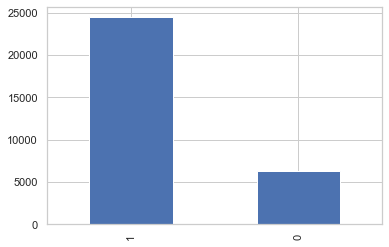

In [3]:
data.retained.value_counts().plot(kind='bar')
plt.show()

### Changing the columns into datetime

In [4]:
data['firstorder']= data.firstorder.astype('datetime64')
data['lastorder'] = data.lastorder.astype('datetime64')

### Data information

In [5]:
data.describe()

,retained,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep
count,30781.000000,30781.000000,30781.000000,30781.000000,30781.000000,30781.000000,30781.000000,30781.000000,30781.000000
mean,0.794581,28.136708,25.555884,5.672685,61.840438,0.037753,0.649102,0.095059,0.038920
std,0.404014,16.749906,29.556042,10.563981,40.941429,0.103961,0.477259,0.293301,0.193408
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,16.000000,2.083333,0.000000,40.020000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,32.000000,13.207547,0.000000,50.960000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,42.000000,40.000000,7.142857,74.250000,0.040816,1.000000,0.000000,0.000000
max,1.000000,291.000000,100.000000,100.000000,2600.140000,3.250000,1.000000,1.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30781 entries, 0 to 30780
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   custid      30781 non-null  object        
 1   retained    30781 non-null  int64         
 2   created     30781 non-null  datetime64[ns]
 3   firstorder  30781 non-null  datetime64[ns]
 4   lastorder   30781 non-null  datetime64[ns]
 5   esent       30781 non-null  int64         
 6   eopenrate   30781 non-null  float64       
 7   eclickrate  30781 non-null  float64       
 8   avgorder    30781 non-null  float64       
 9   ordfreq     30781 non-null  float64       
 10  paperless   30781 non-null  int64         
 11  refill      30781 non-null  int64         
 12  doorstep    30781 non-null  int64         
 13  favday      30781 non-null  object        
 14  city        30781 non-null  object        
dtypes: datetime64[ns](3), float64(4), int64(5), object(3)
memory usage: 3.

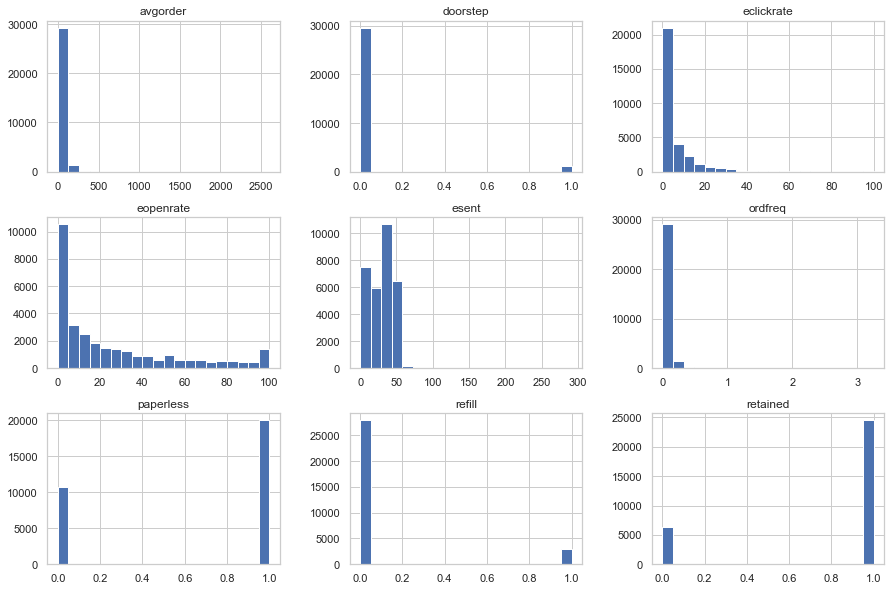

In [7]:
data.hist(bins=20,figsize=(15,10))
plt.show()

In [8]:
data = data.drop(['ordfreq','custid'],axis=1)

In [9]:
data = data.drop(['firstorder','lastorder','created'],axis=1)

In [10]:
data.head()

,retained,esent,eopenrate,eclickrate,avgorder,paperless,refill,doorstep,favday,city
0,0,29,100.000000,3.448276,14.52,0,0,0,Monday,DEL
1,1,95,92.631579,10.526316,83.69,1,1,1,Friday,DEL
2,0,0,0.000000,0.000000,33.58,0,0,0,Wednesday,DEL
3,0,0,0.000000,0.000000,54.96,0,0,0,Thursday,BOM
4,1,30,90.000000,13.333333,111.91,0,0,0,Monday,BOM


### Test-Train Split

In [11]:
inp = data.drop('retained',axis=1)
out = data.retained
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(inp,out,test_size=0.3,random_state=12)

### Outlier Treatment

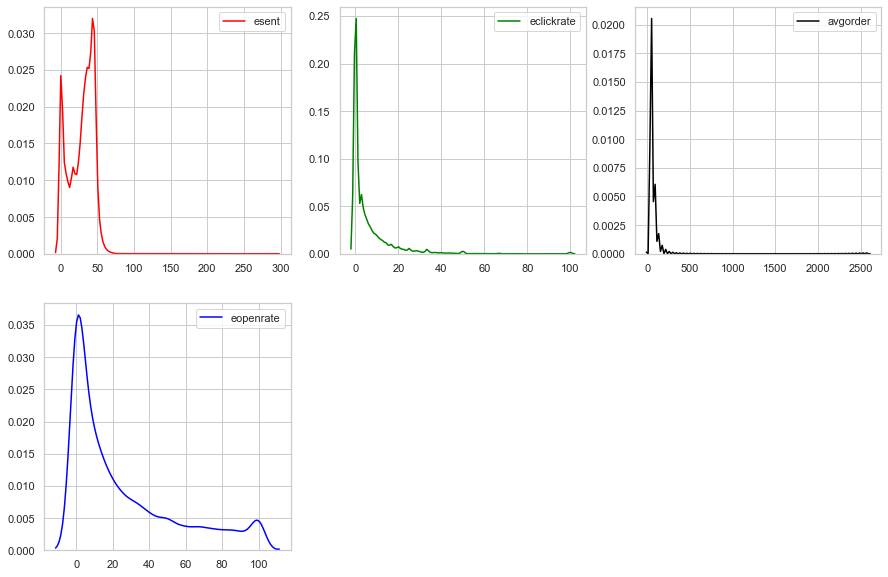

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.kdeplot(xtrain.esent,color='red');
plt.subplot(2,3,2)
sns.kdeplot(data.eclickrate,color='green')
plt.subplot(2,3,3)
sns.kdeplot(data.avgorder,color='black')
plt.subplot(2,3,4)
sns.kdeplot(data.eopenrate,color='blue')
plt.show()

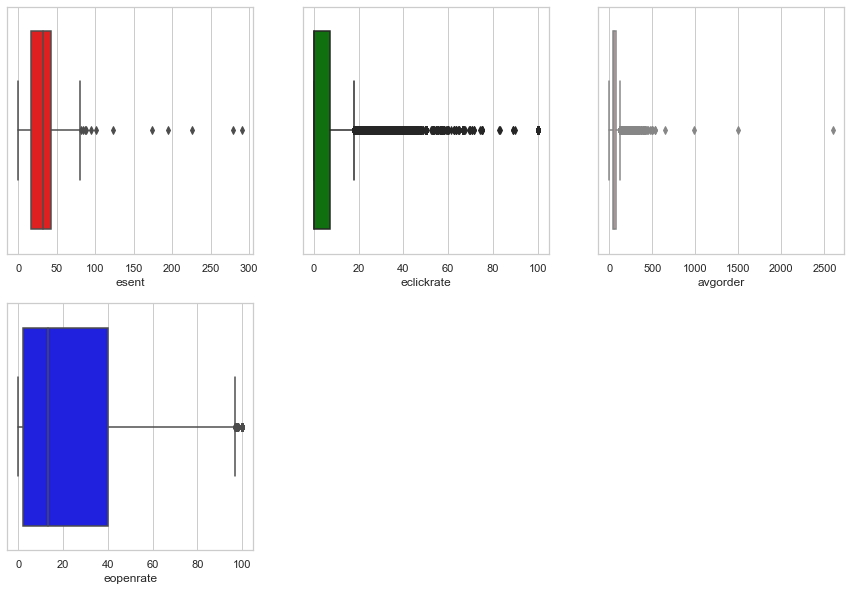

In [13]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(x = data.esent,color='red');
plt.subplot(2,3,2)
sns.boxplot(x = data.eclickrate,color='green')
plt.subplot(2,3,3)
sns.boxplot(x = data.avgorder,color='pink')
plt.subplot(2,3,4)
sns.boxplot(data.eopenrate,color='blue')
plt.show()

In [14]:
def impute(x):
    for i in x.columns:
        iqr = 1.5*(x[i].quantile(0.75) - x[i].quantile(0.25))
        ul = x[i].quantile(0.75) + iqr
        ll = x[i].quantile(0.25) - iqr
        temp = []
        for j in x[i].index:
            if x[i][j] > ul or x[i][j] < ll :
                temp.append(np.median(x[i]))
            elif x[i][j] < 0:
                temp.append(0)
            else:
                temp.append(x[i][j])
        x[i]= temp
    return x

In [15]:
xtrain[['esent','eclickrate','avgorder','eopenrate']] = impute(xtrain[['esent','eclickrate','avgorder','eopenrate']])
xtest[['esent','eclickrate','avgorder','eopenrate']] = impute(xtest[['esent','eclickrate','avgorder','eopenrate']])

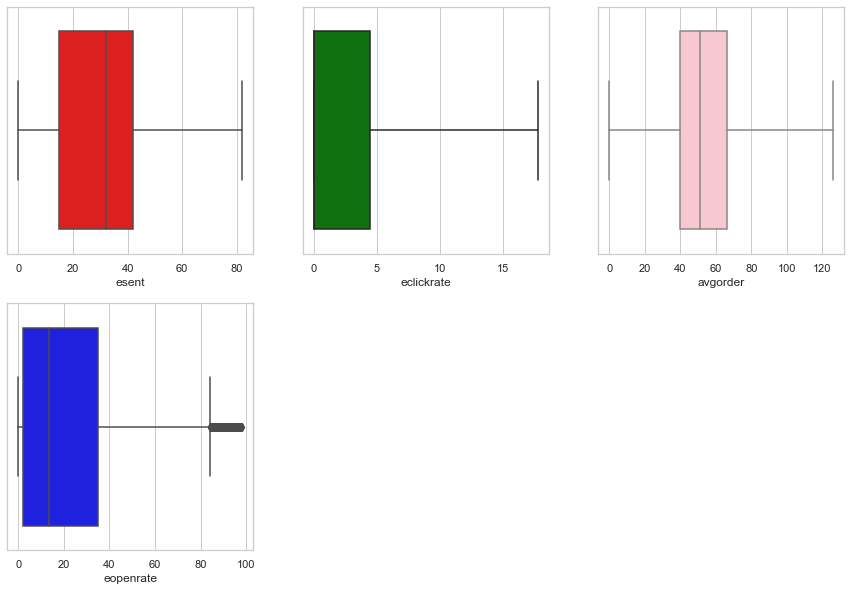

In [16]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(x = xtrain.esent,color='red');
plt.subplot(2,3,2)
sns.boxplot(x = xtrain.eclickrate,color='green',whis=6)
plt.subplot(2,3,3)
sns.boxplot(x = xtrain.avgorder,color='pink',whis=3)
plt.subplot(2,3,4)
sns.boxplot(xtrain.eopenrate,color='blue')
plt.show()

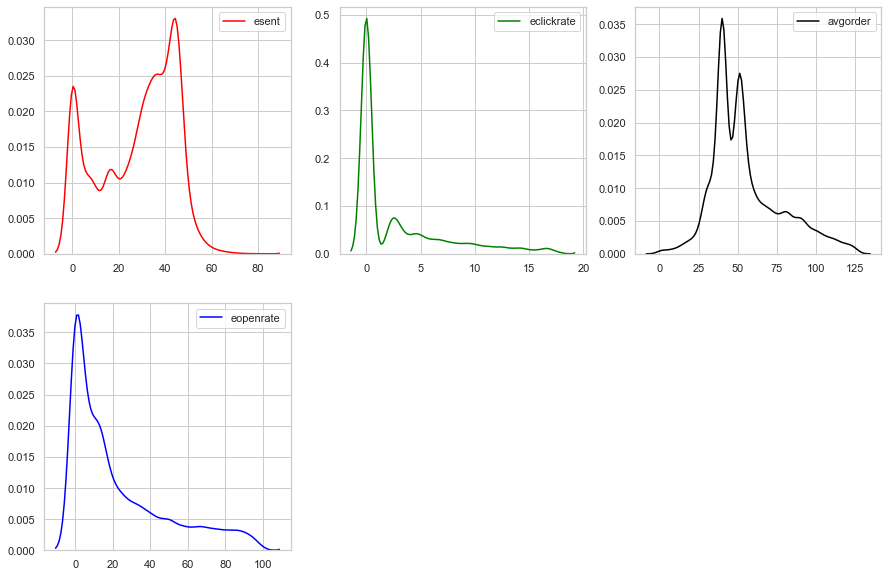

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.kdeplot(xtrain.esent,color='red');
plt.subplot(2,3,2)
sns.kdeplot(xtrain.eclickrate,color='green')
plt.subplot(2,3,3)
sns.kdeplot(xtrain.avgorder,color='black')
#plt.subplot(2,3,4)
#sns.kdeplot(xtrain.ordfreq,color='orange')
plt.subplot(2,3,4)
sns.kdeplot(xtrain.eopenrate,color='blue')
plt.show()

In [18]:
xtrain.describe()

,esent,eopenrate,eclickrate,avgorder,paperless,refill,doorstep
count,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000
mean,27.991646,22.610320,2.783496,54.945846,0.649355,0.094681,0.037548
std,16.528547,25.907751,4.313310,22.619779,0.477183,0.292781,0.190104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,2.127660,0.000000,40.020000,0.000000,0.000000,0.000000
50%,32.000000,13.333333,0.000000,50.940000,1.000000,0.000000,0.000000
75%,42.000000,35.000000,4.444444,66.195000,1.000000,0.000000,0.000000
max,82.000000,98.305085,17.777778,126.020000,1.000000,1.000000,1.000000


## Data Visualization

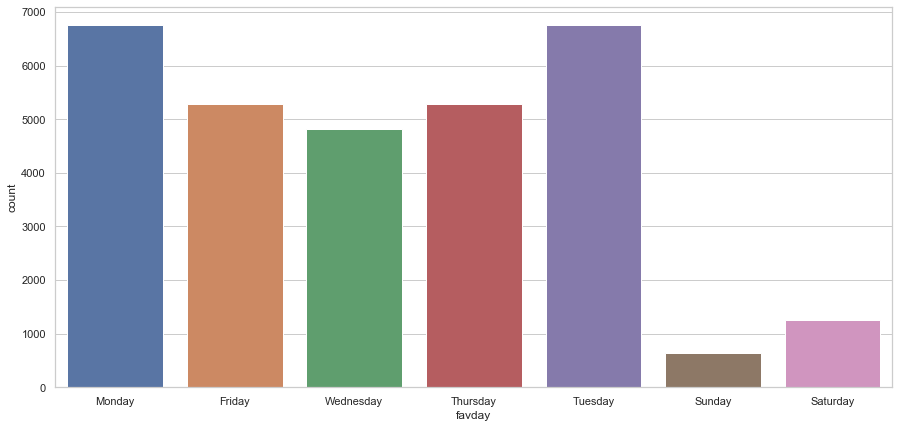

In [19]:
plt.figure(figsize=(15,7))
sns.countplot(x = data.favday)
plt.show()

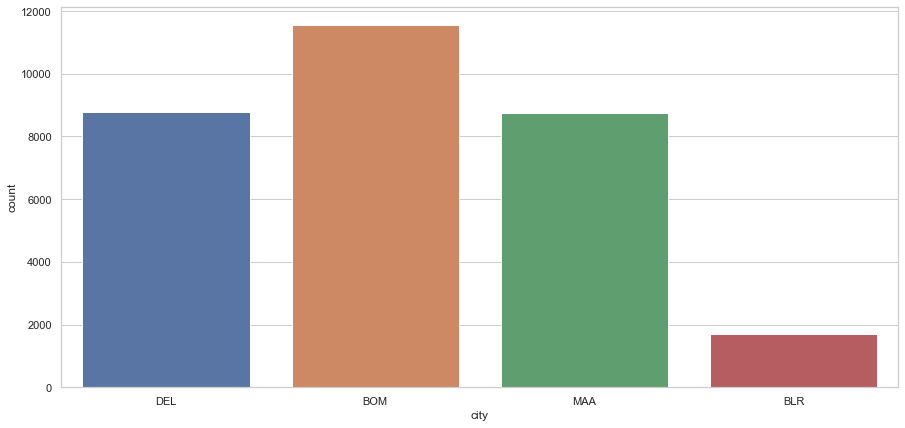

In [20]:
plt.figure(figsize=(15,7))
sns.countplot(x = data.city)
plt.show()

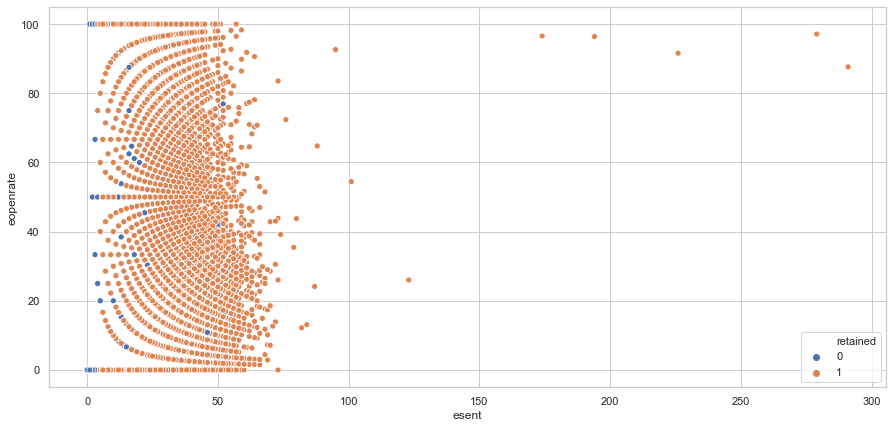

In [21]:
plt.figure(figsize=(15,7))
sns.scatterplot(x= data.esent, y = data.eopenrate, hue= data.retained)
plt.show()

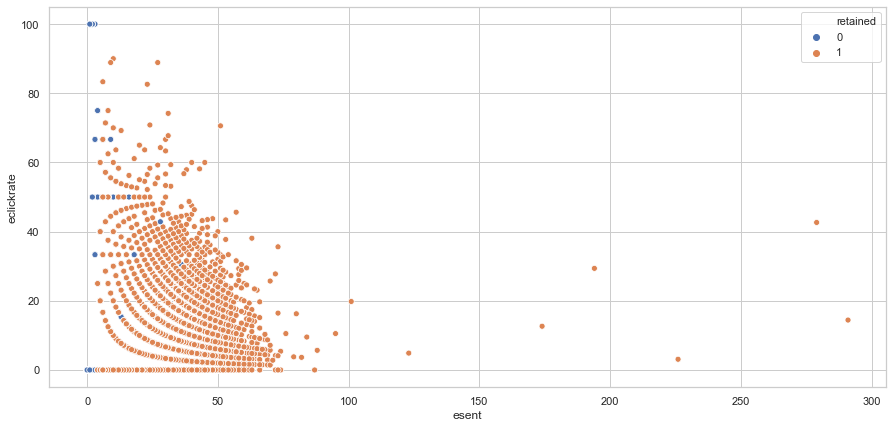

In [22]:
plt.figure(figsize=(15,7))
sns.scatterplot(x= data.esent, y = data.eclickrate, hue= data.retained)
plt.show()

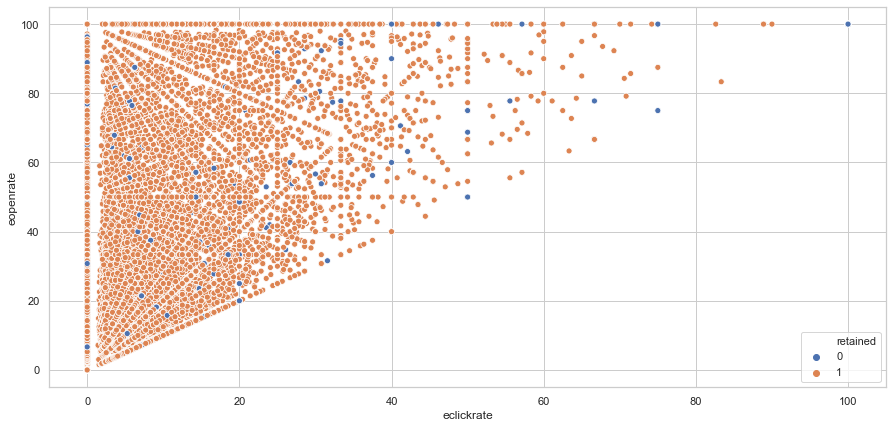

In [23]:
plt.figure(figsize=(15,7))
sns.scatterplot(x= data.eclickrate, y = data.eopenrate, hue= data.retained)
plt.show()

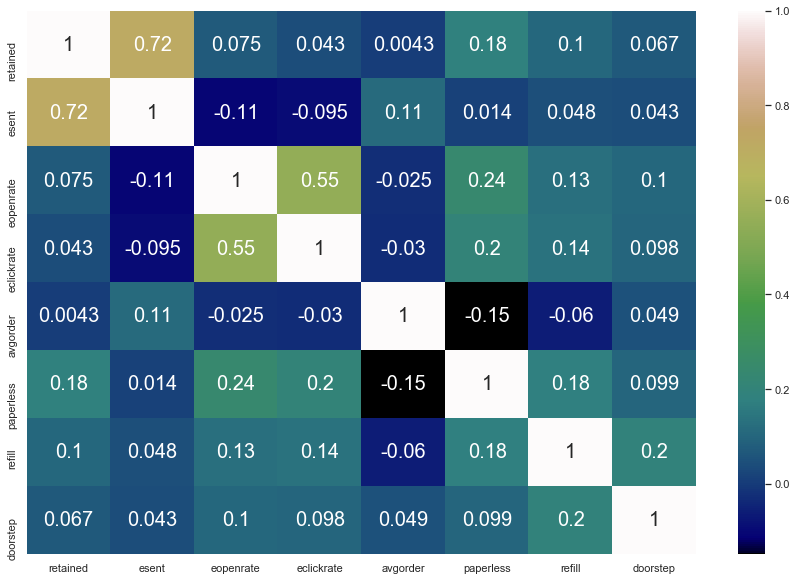

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,annot_kws={'size':20}, cmap = 'gist_earth');

In [25]:
xtrain.head()

,esent,eopenrate,eclickrate,avgorder,paperless,refill,doorstep,favday,city
26377,0.0,0.000000,0.000000,50.72,0,0,0,Tuesday,DEL
12904,45.0,4.444444,2.222222,74.76,1,0,0,Friday,MAA
19672,27.0,85.185185,14.814815,55.07,1,1,0,Wednesday,BOM
18241,34.0,0.000000,0.000000,46.17,1,0,0,Tuesday,MAA
2056,55.0,18.181818,1.818182,50.94,1,0,0,Monday,DEL


In [26]:
xtest.head()

,esent,eopenrate,eclickrate,avgorder,paperless,refill,doorstep,favday,city
23814,9,0.000000,0.000000,31.02,1,0,0,Monday,DEL
16885,40,7.500000,5.000000,68.88,1,0,0,Monday,MAA
28714,37,0.000000,0.000000,40.02,1,0,0,Wednesday,BOM
3392,43,6.976744,0.000000,7.70,0,0,0,Thursday,BOM
1764,46,2.173913,2.173913,87.50,0,0,0,Tuesday,BLR


## Transformation

In [27]:
xtrain['avgorder'] = s.boxcox(xtrain.avgorder+1)[0]
xtrain['esent'] = s.boxcox(xtrain.esent+1)[0]
xtrain['eopenrate'] = s.boxcox(xtrain.eopenrate+1)[0]
xtrain['eclickrate'] = s.boxcox(xtrain.eclickrate+1)[0]

In [28]:
xtrain.head()

,esent,eopenrate,eclickrate,avgorder,paperless,refill,doorstep,favday,city
26377,0.000000,0.000000,0.000000,10.050001,0,0,0,Tuesday,DEL
12904,28.737037,1.927733,0.788593,12.201272,1,0,0,Friday,MAA
19672,18.503292,6.326022,1.192450,10.476954,1,1,0,Wednesday,BOM
18241,22.578927,0.000000,0.000000,9.580403,1,0,0,Tuesday,MAA
2056,34.135013,3.710895,0.728382,10.072085,1,0,0,Monday,DEL


In [29]:
xtest['avgorder'] = s.boxcox(xtest.avgorder+1)[0]
xtest['esent'] = s.boxcox(xtest.esent+1)[0]
xtest['eopenrate'] = s.boxcox(xtest.eopenrate+1)[0]
xtest['eclickrate'] = s.boxcox(xtest.eclickrate+1)[0]

In [30]:
xtest.head()

,esent,eopenrate,eclickrate,avgorder,paperless,refill,doorstep,favday,city
23814,7.332319,0.000000,0.000000,8.233302,1,0,0,Monday,DEL
16885,27.665769,2.479603,0.982111,12.569997,1,0,0,Monday,MAA
28714,25.829369,0.000000,0.000000,9.450932,1,0,0,Wednesday,BOM
3392,29.484299,2.395254,0.000000,3.630310,0,0,0,Thursday,BOM
1764,31.286335,1.249433,0.770719,14.207098,0,0,0,Tuesday,BLR


In [31]:
xtest.describe()

,esent,eopenrate,eclickrate,avgorder,paperless,refill,doorstep
count,9235.000000,9235.000000,9235.000000,9235.000000,9235.000000,9235.000000,9235.000000
mean,19.850333,2.818226,0.396382,10.911535,0.648511,0.095939,0.042122
std,11.009007,2.041551,0.489902,2.351381,0.477461,0.294524,0.200879
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.286070,0.000000,0.000000,9.450932,0.000000,0.000000,0.000000
50%,23.350213,3.115985,0.000000,10.749145,1.000000,0.000000,0.000000
75%,28.880018,4.526993,0.951031,12.249096,1.000000,0.000000,0.000000
max,50.835025,6.319732,1.177551,16.968334,1.000000,1.000000,1.000000


In [32]:
xtrain.describe()

,esent,eopenrate,eclickrate,avgorder,paperless,refill,doorstep
count,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000
mean,18.475017,2.974179,0.411344,10.214720,0.649355,0.094681,0.037548
std,10.320500,2.132582,0.503266,2.143288,0.477183,0.292781,0.190104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.097454,1.242879,0.000000,8.901619,0.000000,0.000000,0.000000
50%,21.428730,3.268096,0.000000,10.072085,1.000000,0.000000,0.000000
75%,27.083059,4.735864,0.975280,11.487842,1.000000,0.000000,0.000000
max,48.030764,6.604207,1.214238,15.717931,1.000000,1.000000,1.000000


## Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [34]:
a = SS.fit_transform(xtrain[['eclickrate','eopenrate','eclickrate','avgorder','esent']])

In [35]:
xtrain['eclickrate'] = a[:,0]
xtrain['eopenrate'] = a[:,1]
xtrain['eclickrate'] = a[:,2]
xtrain['avgorder'] = a[:,3]
xtrain['esent'] = a[:,4]

In [36]:
xtrain.head()

,esent,eopenrate,eclickrate,avgorder,paperless,refill,doorstep,favday,city
26377,-1.790170,-1.394670,-0.817369,-0.076855,0,0,0,Tuesday,DEL
12904,0.994357,-0.490706,0.749618,0.926893,1,0,0,Friday,MAA
19672,0.002740,1.571767,1.552109,0.122354,1,1,0,Wednesday,BOM
18241,0.397656,-1.394670,-0.817369,-0.295962,1,0,0,Tuesday,MAA
2056,1.517403,0.345465,0.629975,-0.066551,1,0,0,Monday,DEL


In [37]:
b = SS.transform(xtest[['eclickrate','eopenrate','eclickrate','avgorder','esent']])
b

array([[-0.81736927, -1.39466998, -0.81736927, -0.92449754, -1.07969145],
       [ 1.134151  , -0.23191942,  1.134151  ,  1.09893414,  0.89055428],
       [-0.81736927, -1.39466998, -0.81736927, -0.35637074,  0.71261308],
       ...,
       [-0.81736927,  0.81521519, -0.81736927,  0.53135612, -1.15143763],
       [ 1.33633746,  0.14984141,  1.33633746, -0.35637074,  0.59294766],
       [-0.81736927,  1.55983621, -0.81736927,  2.31546276, -0.3380164 ]])

In [38]:
xtest['eclickrate'] = b[:,0]
xtest['eopenrate'] = b[:,1]
xtest['eclickrate'] = b[:,2]
xtest['avgorder'] = b[:,3]
xtest['esent'] = b[:,4]

In [39]:
xtest.head()

,esent,eopenrate,eclickrate,avgorder,paperless,refill,doorstep,favday,city
23814,-1.079691,-1.394670,-0.817369,-0.924498,1,0,0,Monday,DEL
16885,0.890554,-0.231919,1.134151,1.098934,1,0,0,Monday,MAA
28714,0.712613,-1.394670,-0.817369,-0.356371,1,0,0,Wednesday,BOM
3392,1.066764,-0.271473,-0.817369,-3.072179,0,0,0,Thursday,BOM
1764,1.241375,-0.808778,0.714102,1.862779,0,0,0,Tuesday,BLR


## One Hot Encoding

In [40]:
xtrain = pd.concat((xtrain.drop(columns=['city','favday'],axis=1),pd.get_dummies(xtrain[['favday','city']],drop_first=True)),axis=1)

In [41]:
xtrain.head()

,esent,eopenrate,eclickrate,avgorder,paperless,refill,doorstep,favday_Monday,favday_Saturday,favday_Sunday,favday_Thursday,favday_Tuesday,favday_Wednesday,city_BOM,city_DEL,city_MAA
26377,-1.790170,-1.394670,-0.817369,-0.076855,0,0,0,0,0,0,0,1,0,0,1,0
12904,0.994357,-0.490706,0.749618,0.926893,1,0,0,0,0,0,0,0,0,0,0,1
19672,0.002740,1.571767,1.552109,0.122354,1,1,0,0,0,0,0,0,1,1,0,0
18241,0.397656,-1.394670,-0.817369,-0.295962,1,0,0,0,0,0,0,1,0,0,0,1
2056,1.517403,0.345465,0.629975,-0.066551,1,0,0,1,0,0,0,0,0,0,1,0


In [42]:
xtest = pd.concat((xtest.drop(columns=['city','favday'],axis=1),pd.get_dummies(xtest[['favday','city']],drop_first=True)),axis=1)

In [43]:
xtest.head()

,esent,eopenrate,eclickrate,avgorder,paperless,refill,doorstep,favday_Monday,favday_Saturday,favday_Sunday,favday_Thursday,favday_Tuesday,favday_Wednesday,city_BOM,city_DEL,city_MAA
23814,-1.079691,-1.394670,-0.817369,-0.924498,1,0,0,1,0,0,0,0,0,0,1,0
16885,0.890554,-0.231919,1.134151,1.098934,1,0,0,1,0,0,0,0,0,0,0,1
28714,0.712613,-1.394670,-0.817369,-0.356371,1,0,0,0,0,0,0,0,1,1,0,0
3392,1.066764,-0.271473,-0.817369,-3.072179,0,0,0,0,0,0,1,0,0,1,0,0
1764,1.241375,-0.808778,0.714102,1.862779,0,0,0,0,0,0,0,1,0,0,0,0


In [44]:
data.dtypes

retained        int64
esent           int64
eopenrate     float64
eclickrate    float64
avgorder      float64
paperless       int64
refill          int64
doorstep        int64
favday         object
city           object
dtype: object

In [45]:
xtrain.to_csv('train.csv')

In [46]:
xtest.to_csv('test.csv')

## Machine Learning Modelling

#### 1.  LOGISTIC REGRESSION

In [47]:
import statsmodels.api as sm

In [48]:
print(ytest.shape)
print(xtest.shape)
print(xtrain.shape)
print(ytrain.shape)

(9235,)
(9235, 16)
(21546, 16)
(21546,)


#### Full Model

In [49]:
log_reg = sm.Logit(ytrain,xtrain).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.178462
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               retained   No. Observations:                21546
Model:                          Logit   Df Residuals:                    21530
Method:                           MLE   Df Model:                           15
Date:                Fri, 27 Aug 2021   Pseudo R-squ.:                  0.6493
Time:                        18:58:13   Log-Likelihood:                -3845.1
converged:                       True   LL-Null:                       -10963.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
esent                3.1020      0.052     59.553      0.000       3.000       3.204
eopenrate  

In [50]:
odds = pd.DataFrame((np.exp(log_reg.params)),index = xtrain.columns,columns=['ODDS'])
odds

,ODDS
esent,22.241480
eopenrate,1.115226
eclickrate,1.065631
avgorder,0.802835
paperless,3.222392
refill,2.327623
doorstep,2.967739
favday_Monday,1.585693
favday_Saturday,3.925158
favday_Sunday,2.133882


In [89]:
from sklearn.metrics import confusion_matrix,precision_score,f1_score,cohen_kappa_score

In [52]:
ypred = log_reg.predict(xtrain)
ypred = [1 if i > 0.5 else 0 for i in ypred]

In [53]:
cm = confusion_matrix(ytrain,ypred)
print(cm)

[[ 3680   762]
 [  639 16465]]


In [112]:
tn = cm[0][0]
tp = cm[1][1]
accuracy = (tn+tp)/len(xtrain)
print('Accuracy_train:',accuracy)

ypred_test = log_reg.predict(xtest)
ypred_test = [1 if i > 0.8 else 0 for i in ypred_test]

cm_test = confusion_matrix(ytest,ypred_test)
print('Confusion Matrix:',cm_test)

tn = cm_test[0][0]
tp = cm_test[1][1]
accuracy = (tn+tp)/len(xtest)
print('Accuracy_test:',accuracy)

print('Precision Score:',precision_score(ytest,ypred_test))

print('f1_Score:',f1_score(ytest,ypred_test))

print('Kappa Score:',cohen_kappa_score(ytest,ypred_test))

Accuracy_train: 0.9349763297131718
Confusion Matrix: [[1665  216]
 [ 804 6550]]
Accuracy_test: 0.889550622631294
Precision Score: 0.9680756724800473
f1_Score: 0.9277620396600565
Kappa Score: 0.694996145561023


In [121]:
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [176]:
## RFE SElection
rfe = RFE(estimator=LR,n_features_to_select=5).fit(xtrain,ytrain)

feature_ranking = pd.DataFrame([xtrain.columns,rfe.ranking_],index=['Feature','Ranking']).T
rfe_feat=feature_ranking[feature_ranking.Ranking==1]
rfe_feat

,Feature,Ranking
0,esent,1
4,paperless,1
5,refill,1
6,doorstep,1
9,favday_Sunday,1


In [177]:
x = xtrain[rfe_feat.Feature]
y= ytrain

rfe_reg = sm.Logit(y,x).fit()
print(rfe_reg.summary())

Optimization terminated successfully.
         Current function value: 0.227492
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               retained   No. Observations:                21546
Model:                          Logit   Df Residuals:                    21541
Method:                           MLE   Df Model:                            4
Date:                Sat, 28 Aug 2021   Pseudo R-squ.:                  0.5529
Time:                        15:17:41   Log-Likelihood:                -4901.5
converged:                       True   LL-Null:                       -10963.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
esent             2.6866      0.038     71.355      0.000       2.613       2.760
paperless         3.

In [178]:
rfe_ypred = rfe_reg.predict(xtrain[rfe_feat.Feature])
rfe_ypred = [1 if i > 0.5 else 0 for i in rfe_ypred]

In [179]:
cm_1 = confusion_matrix(y,rfe_ypred)
print('Confusion Matrix:',cm_1)
tn = cm_1[0][0]
tp = cm_1[1][1]
accuracy = (tn+tp)/len(xtrain)
print('Accuracy Train:',accuracy)

Confusion Matrix: [[ 3754   688]
 [ 1253 15851]]
Accuracy Train: 0.9099136730715678


#### Backward Feature Selection

In [166]:
lb = sfs(estimator= LR, k_features='best', scoring='f1',forward=False).fit(xtrain,ytrain)
back_feat = list(lb.k_feature_names_)

x = xtrain[back_feat]
y = ytrain
lr_back = sm.Logit(y,x).fit()

print(lr_back.summary())

Optimization terminated successfully.
         Current function value: 0.178538
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               retained   No. Observations:                21546
Model:                          Logit   Df Residuals:                    21531
Method:                           MLE   Df Model:                           14
Date:                Sat, 28 Aug 2021   Pseudo R-squ.:                  0.6491
Time:                        14:47:45   Log-Likelihood:                -3846.8
converged:                       True   LL-Null:                       -10963.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
esent                3.1265      0.051     61.845      0.000       3.027       3.226
eopenrate  

In [142]:
ypred = lr_back.predict(xtrain[back_feat])
ypred = [1 if i >0.5 else 0 for i in ypred]

In [154]:
print('Precision Score:',precision_score(ytrain,ypred))
print('f1 Score:',f1_score(ytrain,ypred))

Precision Score: 0.9558755225267069
f1 Score: 0.9592169657422512


####  Forward Selection

In [155]:
lf = sfs(estimator= LR, k_features='best', scoring='f1',forward=True).fit(xtrain,ytrain)

In [163]:
forw_feat = list(lf.k_feature_names_)
x = xtrain[forw_feat]
y = ytrain
lr_forw = sm.Logit(y,x).fit()
print(lr_forw.summary())

Optimization terminated successfully.
         Current function value: 0.178538
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               retained   No. Observations:                21546
Model:                          Logit   Df Residuals:                    21531
Method:                           MLE   Df Model:                           14
Date:                Sat, 28 Aug 2021   Pseudo R-squ.:                  0.6491
Time:                        14:45:53   Log-Likelihood:                -3846.8
converged:                       True   LL-Null:                       -10963.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
esent                3.1265      0.051     61.845      0.000       3.027       3.226
eopenrate  